In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('TrainingData.csv')
data = df

In [18]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [19]:
data.describe() # Gets the summary of various numerical values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
# It can be seen that LoanAmount is missing (614 - 592) = 22 values. 
# Loan_Amount_Term is missing 14 values
# Credit_History is missing 50 values
# About 84% of people have a credit history, this can be determined from the mean field

In [21]:
print("Stats on the Property Area field")
print('--------------------------------')
data['Property_Area'].value_counts()

Stats on the Property Area field
--------------------------------


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [22]:
print("Stats on the Education field")
print('--------------------------------')
data['Education'].value_counts()

Stats on the Education field
--------------------------------


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [23]:
print("Stats on the Married field")
print('--------------------------------')
data['Married'].value_counts()

Stats on the Married field
--------------------------------


Yes    398
No     213
Name: Married, dtype: int64

# Distribution Analaysis for Applicant Income

Lets plot the histogram of ApplicantIncome

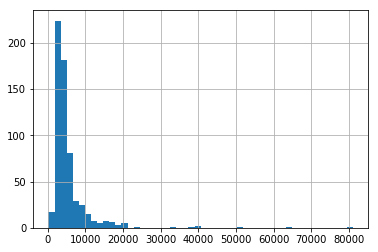

In [24]:
data['ApplicantIncome'].hist(bins=50)

There seems to be a lot of extreme values and outliers in Applicant Income.  Lets use a box plot to confirm our suspicion.  These outliers can stem from various Education levels of individuals, ethnic background, different upbringings, etc..

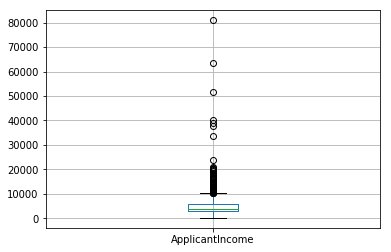

In [25]:
data.boxplot(column='ApplicantIncome')

Let us see how education plays a roll in applicant income

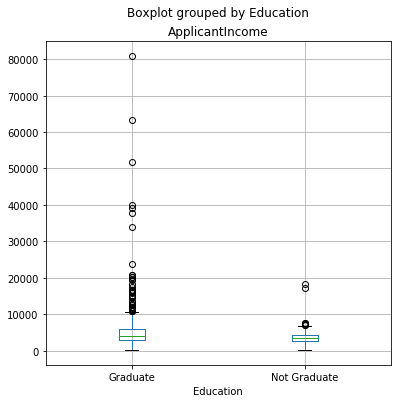

In [26]:
data.boxplot(column='ApplicantIncome', by='Education', figsize=(6,6))

The mean income for individuals seem to be similar regardless of graduation status.  However, if you an individual has graduated, they seem to have a higher range of incomes, these are the outliers.  


# Distribution Analaysis for Loan Amount

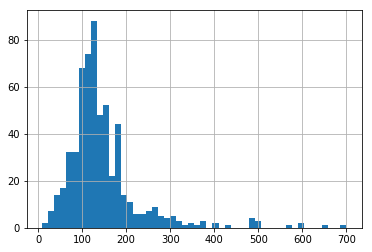

In [27]:
data['LoanAmount'].hist(bins=50)

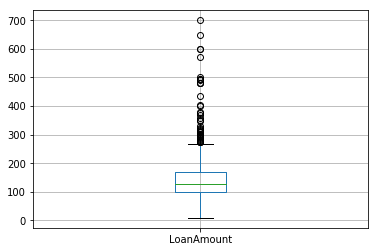

In [28]:
data.boxplot(column='LoanAmount') # Even this field has MANY outliers, in addition to missing values.. This is alarming

In [29]:
frequency_CH = data['Credit_History'].value_counts(ascending=True)
pivot_table = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency for Credit History:')
print(frequency_CH)

print('\nProbability of getting loan for each Credit History class:')
print(pivot_table)

Frequency for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


This pivot table shows that if you an individual follows credit history guidelines, then they are more likely to obtain a loan.  

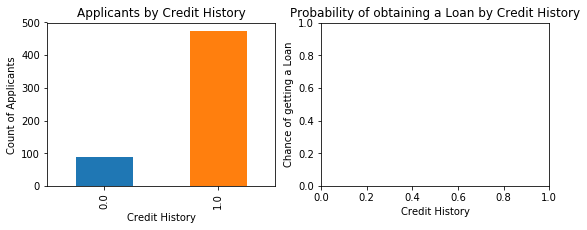

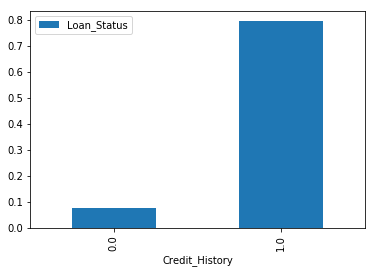

In [31]:
figure = plt.figure(figsize=(9,3))
ax1 = figure.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit History')
frequency_CH.plot(kind='bar')

ax2 = figure.add_subplot(122)
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Chance of getting a Loan')
ax2.set_title('Probability of obtaining a Loan by Credit History')
pivot_table.plot(kind='bar')

# Check for missing values in the dataset

In [32]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [36]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [38]:
data['Self_Employed'].fillna('No', inplace=True)